
#Part 1: Binary Classification with Perceptron using Stochastic Gradient Descent and Batch/MiniBatch Gradient Descent (13 marks)

You are to implement the Perceptron algorithm with

1.   Stochastic Gradient Descent (SGD) AND
2.   Either Batch Gradient Descent (BGD) or MiniBatch Gradient Descent (Mini BGD)

You can choose your variation of Gradient Descent from here

https://sebastianraschka.com/faq/docs/sgd-methods.html

but please state which version you are implementing.


Submission deadline is **26th April (Tuesday), 2PM**. Submission link (via Google Form) will be updated on Spectrum. You are to submit a link to your colab notebook. If there are parts where the requirement is unclear please inform me. 

There are no extra marks for early submission. If you are able to complete it rather quickly, consider how relatively easy you find the assignment to be and the fact that it is done and dusted as a reward itself. 

In this assignment, you will learn (explicitly or implicitly)


1.   How to update weights with Grad Descent in the Perceptron algorithm
2.   The difference between Stochastic Grad Descent, Batch Grad Descent, Mini Batch Grad Descent
3.   How to create your own artificial dataset 



This assignment is inspired by Quoc V. Lee's introductory tutorial on Deep Learning: https://ai.stanford.edu/~quocle/tutorial1.pdf

#What is (not) allowed

Your are not allowed to use external dataset. You must create your own.

You can complete the assignment by importing just these:

numpy, random, math, matplotlib, mpl_toolkits(mplot3d)


No PyTorch (it's only a single layer perceptron), no sklearn (sklearn shuffle is allowed though), no pandas 



#The background problem
You are stuck in your room and trying to decide whether you should watch the movie `Godzilla' or not. You ask your close friends Mary and John, who have watched the movie to hear their opinions about the movie. Mary gave a rating of 2 and John gave a rating of 10. Ratings leaning more towards the positive indicate *that* particular movie is good. 

Given these ratings, it is difficult for you to decide if it is worth watching the movie, but thankfully, you have kept a table of their ratings for some movies in the past. For each movie, you also noted whether you liked the movie or not. Maybe you can use this data to decide if you should watch 'Godzilla'. 

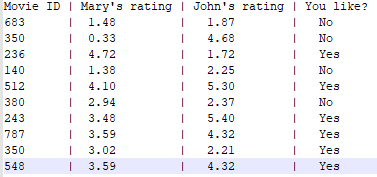

The dataset in the table above is just an example. In this task, you are asked to write a Perceptron algorithm with Stochastic Gradient Descent (SGD) and BGD/Mini BGD to solve a Binary Classification problem as stated in the reference by Quoc V Lee. However rather than give you the dataset, you are first tasked to create your own unique dataset of Mary's and John's ratings. 

##Create your own dataset
Step 1: Take Y samples of `Yes' class where $Y \sim \mathcal{N}(\mu_{Yes},\sigma_{Yes})$

Step:2: Take N samples of 'No' class where $N \sim \mathcal{N}(\mu_{No},\sigma_{No})$.

This can be achieved as below
1. Pick a coordinate, say (a,b) as the centre of your Yes class. 
2. Generate $Y_a$ and $Y_b$ datapoints sampled from a Normal distribution such that $Y_a \sim (\mu_a,\sigma_a)$ and $Y_b \sim (\mu_b,\sigma_b)$. The number of datapoints must be the same. 
3. The pair of ($Y_a, Y_b$) is your datapoints for your Yes class.
4. You choose the values for all means and standard deviations. 


You can set the number of observations of both classes the same i.e $Y=N$. Or you can have an imbalance dataset i.e $Y>N$ where $Y$ is over represented. For each class, sample size of >100 is preferrable as that is usually enough for the distribution to shape like a Normal distribution. If (a,b) and (c,d) are the centres for the Yes and No classes, make sure they are not too far apart and yet not too close as well. Make sure there are some overlapped between datapoints of No and Yes class. As you can see, both classes are normally distributed. You would want to mix/shuffle the datapoints in your dataset.

Remember to fix random seed when initializing the dataset for reproducibility. Example given below

```
np.random.seed(3)
x=np.random.rand(3)
# x will give you the same set of random numbers
```



An example of the dataset I've created is shown below. You are required to visualize your dataset in the same manner.

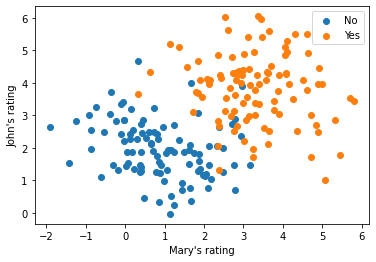

#Training and test data

After you've created your dataset, you can choose to split your data into training and testing dataset with ratio choice of your own (eg 70% training, 30% test). But since we are creating our own dataset, you can use the whole dataset you've created for training and later create a test dataset sampled as $T \sim (\mu_T,\sigma_T)$ with a centre of your choice.

#Code Perceptron algorithm with SGD and BGD/Mini BGD

Once you have created the dataset then it's time code the Perceptron. Activation function is logistic. Error/loss function is Sum of Squared. For SGD implementation, the only differences between the previous Perceptron are (1) Pick a random example for training and (2) Update the weights using gradient.  Given the input pattern and weights defined as

$\mathbf{x}=(x^1,...,x^M)$ 

$\mathbf{w}=(w_1,...,w_M)$ 

and summation function as (b is the bias)

$v=\mathbf{wx^{\intercal}} + b $

and activation function as

$f(v) = \frac{1}{1+e^{-v}}$

**The algorithm using SGD is then as follow**

---



1)  Initilize weights  $\mathbf{w}$ and bias $b$ randomly. For reproducibility purposes, use np.random.seed. Choose a learning rate $\alpha$

2)  Pick a random example $\mathbf{x_k}=(x^1_k,...,x^M_k)$. Previously we iterated through each input pattern.

3)  Compute partial derivatives (gradient components) for each weight $w_i \in \mathbf{w}$ and bias $b$ as


> $\frac{\partial{\epsilon}}{\partial{w_i}} = 2(f(v)-y)f(v)(1-f(v))x^i_k$


> $\frac{\partial{\epsilon}}{\partial{b}} = 2(f(v)-y)f(v)(1-f(v))$

4) Update the weights and bias as 

> $w_i=w_i-\alpha*\frac{\partial{\epsilon}}{\partial{w_i}}$

> $b=w_i-\alpha*\frac{\partial{\epsilon}}{\partial{b}}$

where $y$ is the actual output.

5) Repeat step 2 until convergence.

**Please refer to https://sebastianraschka.com/faq/docs/sgd-methods.html for detail algorithm using BGD/Mini BGD. Choose one. The main difference is you are summing the error over all/mini batch training examples and updating the weights using this sum of error.**



#Expected Output

The algorithm is as above, where it is only rewritten here in vector, matrix notation instead of summation notation as in the reference paper to increase readability. By giving you the reference paper, you are expected to IDENTIFY which variant of SGD does the author of the paper is refering to and IMPLEMENT it. I've used `iteration' as this is what the original paper referred to. There are many variants of SGD as summarized by  

https://sebastianraschka.com/faq/docs/sgd-methods.html



You are required to produce  iteration/epoch vs error and iteration/epoch vs accuracy graphs. An example is given as below.This was evaluated on the training dataset.  

One way to calculate error is for each iteration, after you have updated the weights, calculate the predicted output using the weights you have updated on all inputs of the training dataset, and compare it with the actual output.  The accuracy is then how many % of the training dataset were you able to predict correctly.

For test dataset, no iteration nor any graph needed. Only need to calculate the accuracy of the predicted output vs actual output of your test dataset.

At this stage need to know what is the difference between epoch vs batch vs minibatch

You are required to produce your own version of figures as below. I'm implementing SGD and BGD, you can choose to do the same or  SGD and Mini BGD.

## SGD results
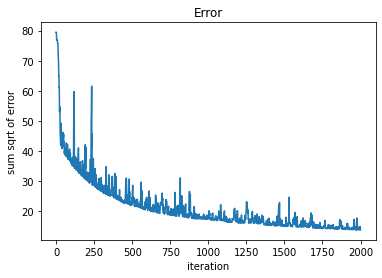

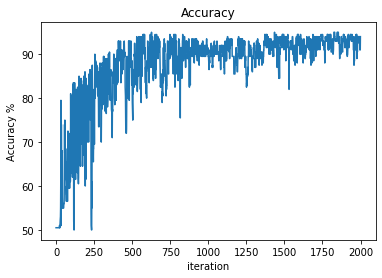

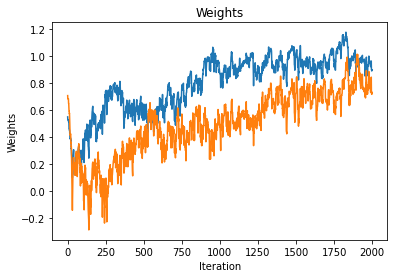


## BGD results
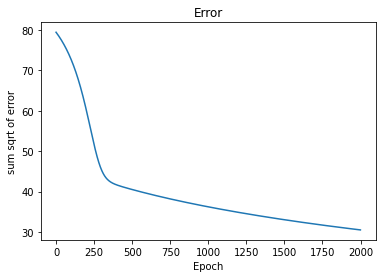

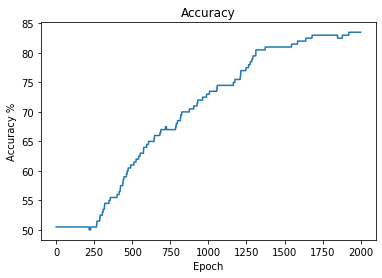

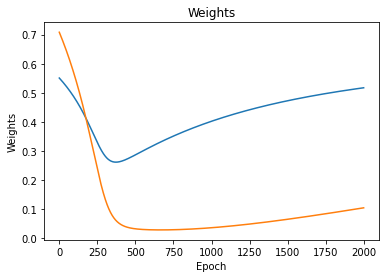

#Questions to ponder upon


1.   Which one is 'smoother' and why is that?
2.   Which one converges faster and why is that?
3.   What happens to the weights as the algorithm converges?
4.   What is the difference between SGD, BGD and Mini BGD?



#Visualize the plot line 

Using the final parameters predicted, derive the equation for

> $v = x_1w_1+x_2w_2+...+x_Mw_M$

Set $v=0$ and plot the decision line.


#SGD
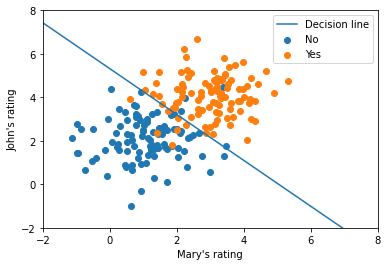

#BGD
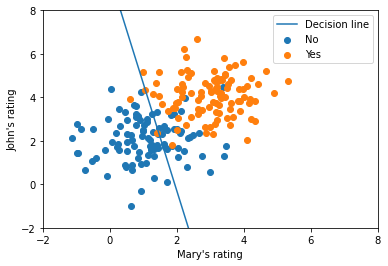


#Compute Accuracy by class

For each implementation of the Gradient Descent version, compute the accuracy by the No and Yes class. Example of result is shown as below. 


SGD \
-------Accuracy by class-------------\
No:91.0%   Yes:96.0%

\

BGD \
-------Accuracy by class-------------\
No:84.0%   Yes:83.0%



#Part 2: Show results for varied dataset (2 marks)



1.   Choose either SGD or BGD/Mini BGD that you have implemented in Part 1
2.   Change the dataset in your first implementation by 


*   Changing the mean and standard deviation
*   Change from normal distribution to something else eg: Log-Normal distribution
*   If you've done Part 1 with balance dataset, now is the time to try with imbalance dataset.


Compute the algorithm chosen in step 1 and show the figure results (error, accuracy, weights updates and  visualization of decision boundary). Also compute the accuracy by class like in Part 1.


In [2]:
import math
import numpy as np 
import random
import matplotlib.pyplot as plt

# Initialize Data

<function matplotlib.pyplot.show(close=None, block=None)>

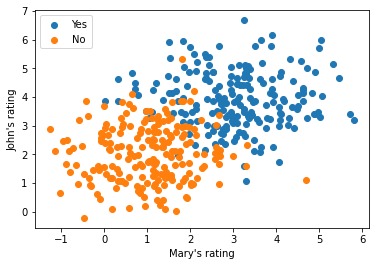

In [3]:
np.random.seed(3) # to get a specific random list of values

yes_j = np.random.normal(4,1,200) #mean,std,samples
yes_m = np.random.normal(3,1,200)

no_j = np.random.normal(2,1,200)
no_m = np.random.normal(1,1,200)

plt.scatter(yes_m,yes_j)
plt.scatter(no_m,no_j)
plt.xlabel("Mary's rating")
plt.ylabel("John's rating")
plt.legend(["Yes","No"])
plt.show

In [4]:
yes_both = np.array([ [yes_j[i],yes_m[i]] for i in range(len(yes_j))] ) #combine john and mary for yes
no_both = np.array([ [no_m[i],no_j[i]] for i in range(len(no_m))] ) #combine john and mary for no

# add new column as label
Y_data = np.append(yes_both, np.ones((200,1)), axis=1) #ones = yes
N_data = np.append(no_both, np.zeros((200,1)), axis=1) #zeros = no

data = np.concatenate([Y_data,N_data])

In [5]:
# the dataset shape
print(data.shape)
print()

# print the first 5 data in the dataset (yes value)
print(data[:5,:])
print()

# print the last 5 data in the dataset (no value)
print(data[-5:,:])

(400, 3)

[[5.78862847 2.67841531 1.        ]
 [4.43650985 3.15113037 1.        ]
 [4.09649747 2.98137228 1.        ]
 [2.1365073  3.48352879 1.        ]
 [3.7226118  3.76896516 1.        ]]

[[ 1.24706745  0.75826014  0.        ]
 [ 0.66525273  3.62911197  0.        ]
 [ 0.51283902  3.44349176  0.        ]
 [-0.85491011  2.50153968  0.        ]
 [ 2.14882126  1.19330149  0.        ]]


#### Split Train and Test dataset

In [6]:
np.random.seed(3)
np.random.shuffle(data) # to shuffle up the dataset

In [7]:
# do the printing here so that we don't shuffled the dataset again and again

print(f'The first 5 data in dataset \n{data[:5,:]}')
print()
print(f'The last 5 data in the dataset \n{data[-5:,:]}')

print("\n the dataset is now shuffled")

The first 5 data in dataset 
[[1.14991872 0.88558729 0.        ]
 [3.45464005 4.08940955 1.        ]
 [1.66694045 2.76807394 0.        ]
 [4.61407709 3.61657788 1.        ]
 [3.26947336 3.37338994 1.        ]]

The last 5 data in the dataset 
[[ 0.18893378  1.59165476  0.        ]
 [ 5.90927681  1.5076029   1.        ]
 [-0.57711136  3.20823864  0.        ]
 [ 2.77909808  3.13801466  1.        ]
 [-0.07786939  2.74363697  0.        ]]

 the dataset is now shuffled


In [8]:
# using split ratio 70% - 30%
split_ratio = 0.7

train_dataset = data[:int(0.7*400),:]
test_dataset = data[int(-0.3*400):,:] #take from behind to avoid taking same dataset as train_dataset

print("this is train_dataset's shape: ", train_dataset.shape)
print("this is test_dataset's shape: ", test_dataset.shape)

this is train_dataset's shape:  (280, 3)
this is test_dataset's shape:  (120, 3)


# Stochastic Gradient Descent

In [9]:
def activation_function(x):
    return 1 / (1+math.exp(-x))

activation_function_v = np.vectorize(activation_function)


def check_threshold(x,threshold=0.5):
    return 1.0 if x > threshold else 0.0

check_threshold_v = np.vectorize(check_threshold)

In [10]:
def SGD(input,learning_rate = 0.01, epoch=2600):

    input = np.append(np.ones((len(input),1)), input, axis=1) # bias, x1, x2
    # print(input.shape) #(280,4)
    np.random.seed(3)
    weight = np.random.rand(len(input[0])-1)
    # print(weight)

    error_history = [] # to plot error graph later
    accuracy_history = [] # to plot accuracy graph later
    weight_history = [] # to plot weight
    
    X = input[:,:3]
    Y = input[:,-1:]

    for current_epoch in range(epoch):
        total_cost = 0.0
        total_accuracy = []

        # select random value in Training set
        j = np.random.randint(0,len(X))
        hypothesis_x = activation_function(np.dot(X[j].T,weight))
        partial_derivative = 2*((hypothesis_x-Y[j])*hypothesis_x*(1-hypothesis_x))*X[j]
        weight = weight - (learning_rate*partial_derivative)
        
        # this loop to calculate error and accuracy
        for i in range(len(input)):
            hypothesis_x = activation_function(np.dot(X[i].T,weight))
            total_cost += (hypothesis_x-Y[i])**2
            predicted_y = check_threshold(hypothesis_x)
            total_accuracy.append(predicted_y == Y[i])
        accuracy = total_accuracy.count(True)/len(X) 

        # use vector method
        # hypothesis_x = activation_function_v(np.dot(X,weight))
        # hypothesis_x = hypothesis_x.reshape(-1,1)
        
        # total_cost = ((hypothesis_x - Y)**2).sum()
        # predicted_y = check_threshold_v(hypothesis_x)
        # sum_accuracy = predicted_y == Y #an array that have boolean value
        # accuracy = np.sum(sum_accuracy)/len(X)

        # printing for each 200 epoch to see updates
        if(current_epoch % 200 == 0):
            print(f'Epoch: {current_epoch}')
            print(f'    error: {total_cost}')
            print(f'    accuracy: {accuracy*100}%')
        
        
        error_history.append(total_cost)
        weight_history.append(weight)
        accuracy_history.append(accuracy)
    
    return error_history, weight_history, accuracy_history


In [11]:
error_history, weight_history, accuracy_history = SGD(train_dataset, learning_rate=0.1)

Epoch: 0
    error: [100.3336775]
    accuracy: 50.71428571428571%
Epoch: 200
    error: [35.66611752]
    accuracy: 83.21428571428572%
Epoch: 400
    error: [28.51081752]
    accuracy: 88.57142857142857%
Epoch: 600
    error: [23.70457097]
    accuracy: 90.71428571428571%
Epoch: 800
    error: [21.35256043]
    accuracy: 92.14285714285714%
Epoch: 1000
    error: [21.45524338]
    accuracy: 91.78571428571428%
Epoch: 1200
    error: [23.67628316]
    accuracy: 90.0%
Epoch: 1400
    error: [21.39379919]
    accuracy: 92.14285714285714%
Epoch: 1600
    error: [17.92634635]
    accuracy: 92.5%
Epoch: 1800
    error: [16.46747313]
    accuracy: 93.92857142857143%
Epoch: 2000
    error: [17.27231256]
    accuracy: 92.85714285714286%
Epoch: 2200
    error: [15.13877136]
    accuracy: 95.0%
Epoch: 2400
    error: [14.31710053]
    accuracy: 95.0%


# Plotting

Text(0, 0.5, 'Error')

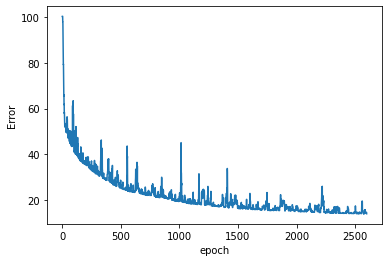

In [12]:
plt.plot(error_history)
plt.xlabel("epoch")
plt.ylabel("Error")

Text(0, 0.5, 'accuracy')

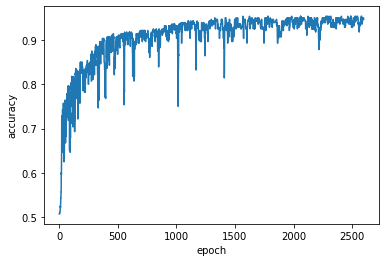

In [13]:
plt.plot(accuracy_history)
plt.xlabel("epoch")
plt.ylabel("accuracy")

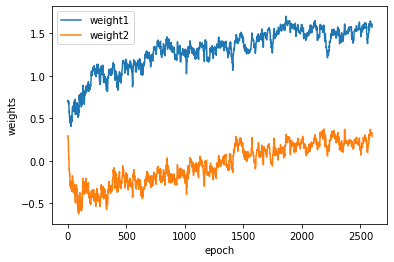

In [14]:
weight_history = np.array(weight_history)
plt.plot(weight_history[:,1:])
plt.xlabel("epoch")
plt.ylabel("weights")
plt.legend(['weight1','weight2'])

[-4.31660155  1.57196208  0.28600273]


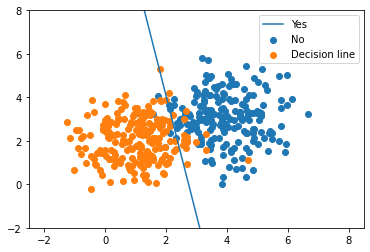

In [15]:
weight = weight_history[-1]
print(weight)


plt.scatter(Y_data[:,0],Y_data[:,1])
plt.scatter(N_data[:,0],N_data[:,1])

x = np.linspace(-2.0, 8.0, 50)
y = -(weight[0] + weight[1]*x)/weight[2]
plt.plot(x, y)

plt.ylim(-2,8)
plt.legend(['Yes', 'No', 'Decision line'])

In [16]:
'''Using test dataset (after splitting) to evaluate'''
label = np.unique(test_dataset[:,-1:], return_counts=True)
print(label)

true_positive_count = 0
true_negative_count = 0

testing_dataset_new = np.append(np.ones((len(test_dataset),1)), test_dataset, axis=1)

x = testing_dataset_new[:,:3]
y = testing_dataset_new[:,-1:]

for i in range(len(testing_dataset_new)):
    hx = activation_function(np.dot(x[i], weight))
    predicted_y = check_threshold(hx)

    # check if it's true positive
    if y[i] == 1.0:
        if predicted_y == y[i]:
            true_positive_count += 1

    # check if it's true negative
    else:
        if predicted_y == y[i]:
            true_negative_count += 1

print()
print("-----------ACCURACY BY CLASS-----------")
noclass = '{:.2f}'.format((true_negative_count/label[1][0])*100)
yesclass = '{:.2f}'.format(((true_positive_count/label[1][1])*100))
print(f'YES class: {yesclass}%     NO class: {noclass}%')

(array([0., 1.]), array([62, 58], dtype=int64))

-----------ACCURACY BY CLASS-----------
YES class: 94.83%     NO class: 90.32%


# Batch Gradient Descent

In [17]:
def BGD(input, learning_rate = 0.01, epoch=100,seed=3):
    input = np.append(np.ones((len(input),1)), input, axis=1)

    np.random.seed(seed)
    weight = np.random.rand(len(input[0])-1)

    error_history = []
    accuracy_history = []
    weight_history = []

    # m = input.shape[0]
    
    for i in range(epoch):
        sum_accuracy = []

        # shuffle the data
        np.random.seed(seed)
        np.random.shuffle(input)
        X = input[:,:3]
        y = input[:,-1:]

        hypothesis_x = activation_function_v(np.dot(X,weight)).reshape(-1,1) #to change the shape to have one column

        # print(hypothesis_x.shape) #before reshape (280,)
        

        # print(hypothesis_x.shape) #after reshape (280,1)
        # print(X.shape) # (280,3)

        predicted_y = check_threshold_v(hypothesis_x)

        sum_accuracy = predicted_y == y #an array that have boolean value

        weight = weight - learning_rate*np.sum(((2*(hypothesis_x - y)*hypothesis_x*(1 - hypothesis_x)) * X), axis=0)

        hypothesis_x = activation_function_v(np.dot(X,weight)).reshape(-1,1)
        cost = ((hypothesis_x - y)**2).sum() #calculate cost using new hx with updated weight

        accuracy = np.sum(sum_accuracy)/len(X)

        if i % 10 == 0:
            print(f'Epoch: {i}')
            print(f'    losses: {cost}')
            print(f'    accuracy: {accuracy}')

        error_history.append(cost)
        accuracy_history.append(accuracy)
        weight_history.append(weight)

    return error_history,accuracy_history,weight_history

In [18]:
error_history, accuracy_history, weight_history = BGD(train_dataset, learning_rate=0.001, epoch=200,seed=3)

Epoch: 0
    losses: 96.56626625344805
    accuracy: 0.5071428571428571
Epoch: 10
    losses: 51.528728540148705
    accuracy: 0.675
Epoch: 20
    losses: 46.57287147625345
    accuracy: 0.7535714285714286
Epoch: 30
    losses: 43.24092464225726
    accuracy: 0.7785714285714286
Epoch: 40
    losses: 40.70581308061976
    accuracy: 0.7928571428571428
Epoch: 50
    losses: 38.640493649563936
    accuracy: 0.8071428571428572
Epoch: 60
    losses: 36.88229060899404
    accuracy: 0.825
Epoch: 70
    losses: 35.342231123722335
    accuracy: 0.8321428571428572
Epoch: 80
    losses: 33.96770327631318
    accuracy: 0.8464285714285714
Epoch: 90
    losses: 32.725470204648005
    accuracy: 0.85
Epoch: 100
    losses: 31.593265269099362
    accuracy: 0.8607142857142858
Epoch: 110
    losses: 30.55534031677624
    accuracy: 0.8714285714285714
Epoch: 120
    losses: 29.599978007154093
    accuracy: 0.8821428571428571
Epoch: 130
    losses: 28.71804354168021
    accuracy: 0.8892857142857142
Epoch: 14

# Plotting

Text(0, 0.5, 'Error')

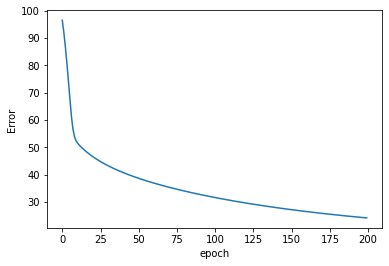

In [19]:
plt.plot(error_history)
plt.xlabel("epoch")
plt.ylabel("Error")

Text(0, 0.5, 'accuracy')

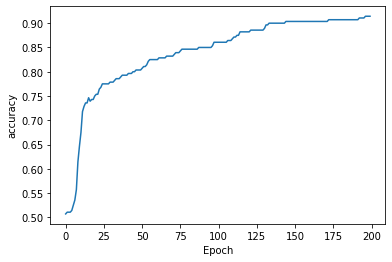

In [20]:
plt.plot(accuracy_history)
plt.xlabel("Epoch")
plt.ylabel("accuracy")

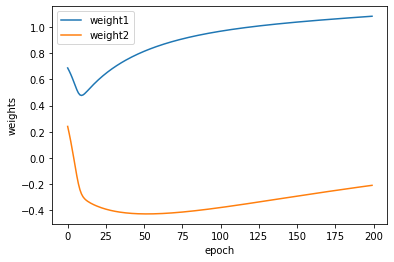

In [21]:
weight_history = np.array(weight_history)
plt.plot(weight_history[:,1:])
plt.xlabel("epoch")
plt.ylabel("weights")
plt.legend(["weight1","weight2"])

[-1.78152446  1.08252883 -0.20849492]


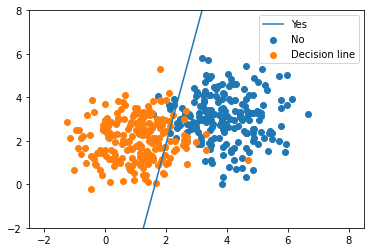

In [22]:
weight = weight_history[-1]
print(weight)


plt.scatter(Y_data[:,0],Y_data[:,1])
plt.scatter(N_data[:,0],N_data[:,1])

x = np.linspace(-2.0, 8.0, 50)
y = -(weight[0] + weight[1]*x)/weight[2]
plt.plot(x, y)

plt.ylim(-2,8)
plt.legend(['Yes', 'No', 'Decision line'])


In [23]:
'''Using test dataset (after splitting) to evaluate'''

label = np.unique(test_dataset[:,-1:], return_counts=True)
print(label)

true_positive_count = 0
true_negative_count = 0

test_dataset_new = np.append(np.ones((len(test_dataset),1)), test_dataset, axis=1)

y = test_dataset_new[:,-1:]
x = test_dataset_new[:,:3]

for i in range(len(test_dataset_new)):
    hx = activation_function(np.dot(x[i], weight))
    predicted_y = check_threshold(hx)

    # check if it's true positive
    if y[i] == 1.0:
        if predicted_y == y[i]:
            true_positive_count += 1

    # check if it's true negative
    else:
        if predicted_y == y[i]:
            true_negative_count += 1

print()
print("-----------ACCURACY BY CLASS-----------")
noclass = '{:.2f}'.format((true_negative_count/label[1][0])*100)
yesclass = '{:.2f}'.format(((true_positive_count/label[1][1])*100))
print(f'YES class: {yesclass}%     NO class: {noclass}%')

(array([0., 1.]), array([62, 58], dtype=int64))

-----------ACCURACY BY CLASS-----------
YES class: 94.83%     NO class: 87.10%


#Part 2: Show results for varied dataset (2 marks)



1.   Choose either SGD or BGD/Mini BGD that you have implemented in Part 1
2.   Change the dataset in your first implementation by 


*   Changing the mean and standard deviation
*   Change from normal distribution to something else eg: Log-Normal distribution
*   If you've done Part 1 with balance dataset, now is the time to try with imbalance dataset.


Compute the algorithm chosen in step 1 and show the figure results (error, accuracy, weights updates and  visualization of decision boundary). Also compute the accuracy by class like in Part 1.


# Creating new unbalance Dataset (Using BGD)

<function matplotlib.pyplot.show(close=None, block=None)>

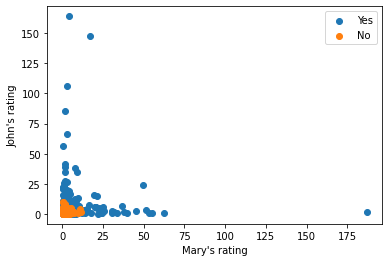

In [93]:
np.random.seed(14) # to get a specific random list of values

#using wald distribution (inverse Gaussian)
yes_j = np.random.wald(7.5,2.0,250) #mean,std,samples
yes_m = np.random.wald(7.5,2.0,250)

no_j = np.random.wald(2.0,2.4,150)
no_m = np.random.wald(2.0,2.4,150)


plt.scatter(yes_m,yes_j)
plt.scatter(no_m,no_j)
plt.xlabel("Mary's rating")
plt.ylabel("John's rating")
plt.legend(["Yes","No"])
plt.show

In [94]:
yes_both = np.array([ [yes_j[i],yes_m[i]] for i in range(len(yes_j))] ) #combine john and mary for yes
no_both = np.array([ [no_m[i],no_j[i]] for i in range(len(no_m))] ) #combine john and mary for no

# add new column as label
Y_data = np.append(yes_both, np.ones((250,1)), axis=1) #ones = yes
N_data = np.append(no_both, np.zeros((150,1)), axis=1) #zeros = no

data = np.concatenate([Y_data,N_data])

In [95]:
# the dataset shape
print(data.shape)
print()

# print the first 5 data in the dataset (yes value)
print(data[:5,:])
print()

# print the last 5 data in the dataset (no value)
print(data[-5:,:])

(400, 3)

[[ 0.68596598  1.87953755  1.        ]
 [ 6.43472938 10.40660479  1.        ]
 [ 5.36326135  0.62604768  1.        ]
 [ 6.52041574  0.56591868  1.        ]
 [ 0.72435272 33.52359983  1.        ]]

[[1.15741445 0.84588551 0.        ]
 [0.40219788 3.02451895 0.        ]
 [1.41312804 3.77173768 0.        ]
 [0.45170622 1.46964071 0.        ]
 [1.21839807 2.58228854 0.        ]]


#### splitting to training and test dataset

In [96]:
np.random.seed(14)
np.random.shuffle(data)

In [97]:
# do the printing here so that we don't shuffled the dataset again and again

print(f'The first 10 data in dataset \n{data[:10,:]}')
print()
print(f'The last 10 data in the dataset \n{data[-10:,:]}')

print("\n the dataset is now shuffled")

The first 10 data in dataset 
[[ 0.71755478 12.17007114  1.        ]
 [13.94043578  1.0685008   1.        ]
 [ 6.43472938 10.40660479  1.        ]
 [ 0.60405376  3.25456051  0.        ]
 [14.72523751  1.43328871  1.        ]
 [ 1.42737612  1.53040808  1.        ]
 [11.77425324  1.52915676  0.        ]
 [ 7.67563624  1.1311986   1.        ]
 [ 7.54854957  0.82815033  1.        ]
 [ 1.75159904  1.36787097  0.        ]]

The last 10 data in the dataset 
[[38.74995485  1.82745517  1.        ]
 [ 2.79622259  2.41898915  1.        ]
 [ 0.49830335  4.60899235  1.        ]
 [ 2.62929741  6.47833713  1.        ]
 [ 0.23785941  2.1444744   0.        ]
 [10.95883444  3.55832942  1.        ]
 [ 0.8311479   0.96533163  0.        ]
 [ 2.71388328  1.14164716  0.        ]
 [ 2.06886737  0.76674499  0.        ]
 [ 3.77662132  7.63343104  1.        ]]

 the dataset is now shuffled


In [98]:
# using split ratio 70% - 30%
split_ratio = 0.7

train_dataset = data[:int(0.7*400),:]
test_dataset = data[int(-0.3*400):,:] #take from behind to avoid taking same dataset as train_dataset

print("this is train_dataset's shape: ", train_dataset.shape)
print("this is test_dataset's shape: ", test_dataset.shape)

this is train_dataset's shape:  (280, 3)
this is test_dataset's shape:  (120, 3)


In [99]:
error_history, accuracy_history, weight_history = BGD(train_dataset, learning_rate=0.001, epoch=200,seed=14)

Epoch: 0
    losses: 92.11101439619512
    accuracy: 0.6357142857142857
Epoch: 10
    losses: 89.04745262153376
    accuracy: 0.6357142857142857
Epoch: 20
    losses: 83.21761375663522
    accuracy: 0.6357142857142857
Epoch: 30
    losses: 69.30695732664303
    accuracy: 0.6357142857142857
Epoch: 40
    losses: 55.202672338132906
    accuracy: 0.6357142857142857
Epoch: 50
    losses: 54.371801906071866
    accuracy: 0.6357142857142857
Epoch: 60
    losses: 54.027722049527924
    accuracy: 0.6321428571428571
Epoch: 70
    losses: 53.748837912848884
    accuracy: 0.6321428571428571
Epoch: 80
    losses: 53.522007144325926
    accuracy: 0.6392857142857142
Epoch: 90
    losses: 53.3369880204636
    accuracy: 0.6428571428571429
Epoch: 100
    losses: 53.18561447705841
    accuracy: 0.6571428571428571
Epoch: 110
    losses: 53.06138359433368
    accuracy: 0.6678571428571428
Epoch: 120
    losses: 52.95911432975622
    accuracy: 0.6714285714285714
Epoch: 130
    losses: 52.87467179654254
    

Text(0, 0.5, 'Sum of Squared Error')

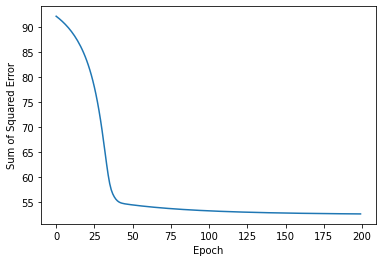

In [100]:
plt.plot(error_history)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Accuracy')

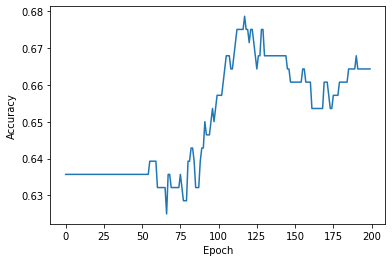

In [101]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

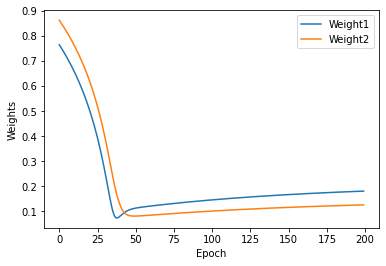

In [102]:
weight_history = np.array(weight_history)
plt.plot(weight_history[:,1:])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend(['Weight1','Weight2'])

[-0.51147525  0.18045374  0.12558734]


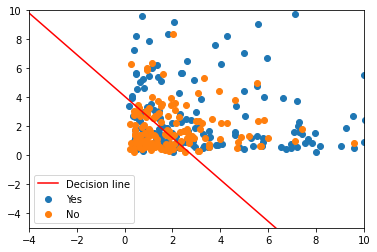

In [103]:
weight = weight_history[-1]
print(weight)


plt.scatter(Y_data[:,0],Y_data[:,1])
plt.scatter(N_data[:,0],N_data[:,1])

x = np.linspace(-20, 20, 50)
y = -(weight[0] + weight[1]*x)/weight[2]
plt.plot(x, y, 'red')

plt.xlim(-4,10)
plt.ylim(-5,10)
plt.legend(['Decision line','Yes', 'No'])

In [104]:
'''Using test dataset (after splitting) to evaluate'''
label = np.unique(test_dataset[:,-1:], return_counts=True)
print(label)

true_positive_count = 0
true_negative_count = 0

testing_dataset_new = np.append(np.ones((len(test_dataset),1)), test_dataset, axis=1)

x = testing_dataset_new[:,:3]
y = testing_dataset_new[:,-1:]

for i in range(len(testing_dataset_new)):
    hx = activation_function(np.dot(x[i], weight))
    predicted_y = check_threshold(hx)

    # check if it's true positive
    if y[i] == 1.0:
        if predicted_y == y[i]:
            true_positive_count += 1

    # check if it's true negative
    else:
        if predicted_y == y[i]:
            true_negative_count += 1

print()
print("-----------ACCURACY BY CLASS-----------")
noclass = '{:.2f}'.format((true_negative_count/label[1][0])*100)
yesclass = '{:.2f}'.format(((true_positive_count/label[1][1])*100))
print(f'YES class: {yesclass}%     NO class: {noclass}%')

(array([0., 1.]), array([48, 72], dtype=int64))

-----------ACCURACY BY CLASS-----------
YES class: 81.94%     NO class: 45.83%


the No class accuracy is low might due to unstable data distribution in training

# Question to ponder upon

##### 1) Which one is 'smoother' and why is that?

BGD because it does gradient descent using all the data available.

##### 2) Which one converges faster and why is that?

SGD because it use only 1 data per iteration.

##### 3) What happens to the weights as the algorithm converges?

The weights would be at optimal state that could produce lowest losses and highest accuracies.

##### 4) What is the difference between SGD, BGD and Mini BGD?

SGD: update weights based on 1 random sample from data

BGD: update weights based on all available data

Mini BGD: update weights based on subset of available data